
Digitale Werbeplattformen versuchen, die Konversionsraten zu optimieren, indem sie den Werbetreibenden verschiedene Gebotsstrategien anbieten.
Einer unserer Kunden, "veridunya.com", hat die Durchführung eines A/B-Tests angefordert, um festzustellen, ob die neue Methode 'Average Bidding' im Vergleich zur Methode 'Maximum Bidding' eine höhere Konversionsrate erzielt.
Der wichtigste Erfolgsindikator für das Unternehmen ist die Kennzahl 'Käufe' (Purchase). Die Analysen sollten dementsprechend durchgeführt werden.
In der Studie gibt es zwei verschiedene Gruppen:
Kontrollgruppe: Die Methode 'Maximum Bidding' wurde angewendet. 
Testgruppe: Die Methode 'Average Bidding' wurde angewendet.

Die Variablen im Datensatz:
Impression: Anzahl der Anzeigenschaltungen
Click: Anzahl der Klicks auf die Anzeige
Purchase: Anzahl der gekauften Produkte nach einem Klick auf die Anzeige
Earning: Einnahmen aus den getätigten Käufen

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [2]:
file_pfad= r"C:\Users\User Laptop\Desktop\phyton\phyton_ders\ha\odev6\ab_test_data.xlsx"

In [ ]:
#1_Vorbereitung und Überprüfung der Daten

In [ ]:
#1.1.

In [3]:
# Das gemeinsame Lesen aller Tabellenblätter
ab_test = pd.read_excel(file_pfad, sheet_name=["Test Group", "Control Group"], engine="openpyxl")


In [4]:
# Zugriff auf das Tabellenblatt 'Test Group' in der Excel-Datei
df_t = ab_test["Test Group"]
print(df_t.head())

    Impression      Click  Purchase    Earning
0 120103.50380 3216.54796 702.16035 1939.61124
1 134775.94336 3635.08242 834.05429 2929.40582
2 107806.62079 3057.14356 422.93426 2526.24488
3 116445.27553 4650.47391 429.03353 2281.42857
4 145082.51684 5201.38772 749.86044 2781.69752


In [5]:
# Zugriff auf das Tabellenblatt 'Control Group' in der Excel-Datei
df_c = ab_test["Control Group"]
print(df_c.head())

    Impression      Click  Purchase    Earning
0  82529.45927 6090.07732 665.21125 2311.27714
1  98050.45193 3382.86179 315.08489 1742.80686
2  82696.02355 4167.96575 458.08374 1797.82745
3 109914.40040 4910.88224 487.09077 1696.22918
4 108457.76263 5987.65581 441.03405 1543.72018


In [ ]:
#1.2.

In [6]:
df_t.describe()

,Impression,Click,Purchase,Earning
count,40.00000,40.00000,40.00000,40.00000
mean,120512.41176,3967.54976,582.10610,2514.89073
std,18807.44871,923.09507,161.15251,282.73085
min,79033.83492,1836.62986,311.62952,1939.61124
25%,112691.97077,3376.81902,444.62683,2280.53743
50%,119291.30077,3931.35980,551.35573,2544.66611
75%,132050.57893,4660.49791,699.86236,2761.54540
max,158605.92048,6019.69508,889.91046,3171.48971


In [7]:
sms.DescrStatsW(df_t).tconfint_mean()

(array([114497.49785266,   3672.32963411,    530.56702249,   2424.4690194 ]),
 array([126527.32566241,   4262.7698875 ,    633.64517081,   2605.3124459 ]))

In [8]:
df_c.describe()

,Impression,Click,Purchase,Earning
count,40.00000,40.00000,40.00000,40.00000
mean,101711.44907,5100.65737,550.89406,1908.56830
std,20302.15786,1329.98550,134.10820,302.91778
min,45475.94296,2189.75316,267.02894,1253.98952
25%,85726.69035,4124.30413,470.09553,1685.84720
50%,99790.70108,5001.22060,531.20631,1975.16052
75%,115212.81654,5923.80360,637.95709,2119.80278
max,147539.33633,7959.12507,801.79502,2497.29522


In [9]:
sms.DescrStatsW(df_c).tconfint_mean()

(array([95218.50398549,  4675.30737485,   508.00417525,  1811.69049289]),
 array([108204.39414991,   5526.0073703 ,    593.78394229,   2005.44610671]))

In [10]:
def correlation(df, purchase):
    dropcol = df.drop("Purchase", axis = 1).columns
    for x in dropcol:
        print(f"{x} correlation with {"Purchase"}")
        print(df["Purchase"].corr(df[x]))

In [11]:
correlation(df_t, "Purchase")
correlation(df_c, "Purchase")

Impression correlation with Purchase
0.13779572364901418
Click correlation with Purchase
-0.07441443787151679
Earning correlation with Purchase
0.10248095262969038
Impression correlation with Purchase
0.21457493332510497
Click correlation with Purchase
0.05739746000254058
Earning correlation with Purchase
0.061728454532799085


In [12]:
df_c["Conversion_Rate"] = (df_c["Purchase"] / df_c["Click"]) * 100
df_t["Conversion_Rate"] = (df_t["Purchase"] / df_t["Click"]) * 100

df_c["Earning_Per_Purchase"] = (df_c["Earning"] / df_c["Purchase"]) * 100
df_t["Earning_Per_Purchase"] = (df_t["Earning"] / df_t["Purchase"]) * 100


df_t.head()

,Impression,Click,Purchase,Earning,Conversion_Rate,Earning_Per_Purchase
0,120103.50380,3216.54796,702.16035,1939.61124,21.82962,276.23480
1,134775.94336,3635.08242,834.05429,2929.40582,22.94458,351.22484
2,107806.62079,3057.14356,422.93426,2526.24488,13.83429,597.31384
3,116445.27553,4650.47391,429.03353,2281.42857,9.22559,531.75997
4,145082.51684,5201.38772,749.86044,2781.69752,14.41655,370.96203


In [13]:
df_c.head()

,Impression,Click,Purchase,Earning,Conversion_Rate,Earning_Per_Purchase
0,82529.45927,6090.07732,665.21125,2311.27714,10.92287,347.45010
1,98050.45193,3382.86179,315.08489,1742.80686,9.31415,553.12295
2,82696.02355,4167.96575,458.08374,1797.82745,10.99058,392.46699
3,109914.40040,4910.88224,487.09077,1696.22918,9.91860,348.23677
4,108457.76263,5987.65581,441.03405,1543.72018,7.36572,350.02290


In [ ]:
#1.3

In [14]:
df_t.columns = [i+"_test" for i in df_t.columns]
df_t.head()

,Impression_test,Click_test,Purchase_test,Earning_test,Conversion_Rate_test,Earning_Per_Purchase_test
0,120103.50380,3216.54796,702.16035,1939.61124,21.82962,276.23480
1,134775.94336,3635.08242,834.05429,2929.40582,22.94458,351.22484
2,107806.62079,3057.14356,422.93426,2526.24488,13.83429,597.31384
3,116445.27553,4650.47391,429.03353,2281.42857,9.22559,531.75997
4,145082.51684,5201.38772,749.86044,2781.69752,14.41655,370.96203


In [15]:
df_c.columns = [i+"_control" for i in df_c.columns]
df_c.head()

,Impression_control,Click_control,Purchase_control,Earning_control,Conversion_Rate_control,Earning_Per_Purchase_control
0,82529.45927,6090.07732,665.21125,2311.27714,10.92287,347.45010
1,98050.45193,3382.86179,315.08489,1742.80686,9.31415,553.12295
2,82696.02355,4167.96575,458.08374,1797.82745,10.99058,392.46699
3,109914.40040,4910.88224,487.09077,1696.22918,9.91860,348.23677
4,108457.76263,5987.65581,441.03405,1543.72018,7.36572,350.02290


In [16]:
t_c = pd.concat([df_t, df_c], axis=1)
t_c.head()

,Impression_test,Click_test,Purchase_test,Earning_test,Conversion_Rate_test,Earning_Per_Purchase_test,Impression_control,Click_control,Purchase_control,Earning_control,Conversion_Rate_control,Earning_Per_Purchase_control
0,120103.50380,3216.54796,702.16035,1939.61124,21.82962,276.23480,82529.45927,6090.07732,665.21125,2311.27714,10.92287,347.45010
1,134775.94336,3635.08242,834.05429,2929.40582,22.94458,351.22484,98050.45193,3382.86179,315.08489,1742.80686,9.31415,553.12295
2,107806.62079,3057.14356,422.93426,2526.24488,13.83429,597.31384,82696.02355,4167.96575,458.08374,1797.82745,10.99058,392.46699
3,116445.27553,4650.47391,429.03353,2281.42857,9.22559,531.75997,109914.40040,4910.88224,487.09077,1696.22918,9.91860,348.23677
4,145082.51684,5201.38772,749.86044,2781.69752,14.41655,370.96203,108457.76263,5987.65581,441.03405,1543.72018,7.36572,350.02290


In [ ]:
#2 Hypothesenformulierung für A/B-Tests

In [ ]:
#2.1

H0: m1=m2  (Es gibt keinen Unterschied zwischen den durchschnittlichen Käufen der Kontrollgruppe und der Testgruppe)

H!: m1!=m2  (Es gibt einen Unterschied zwischen den durchschnittlichen Käufen der Kontrollgruppe und der Testgruppe)

In [17]:
t_c[["Purchase_test", "Purchase_control"]].mean()

Purchase_test      582.10610
Purchase_control   550.89406
dtype: float64

In [ ]:
#3 Hypothesentests und Annahmekontrollen

In [ ]:
#3.1.1.Normalitätstest

In [18]:
test_stat, pvalue = shapiro(t_c["Purchase_test"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9589, p-value = 0.1541


In [19]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

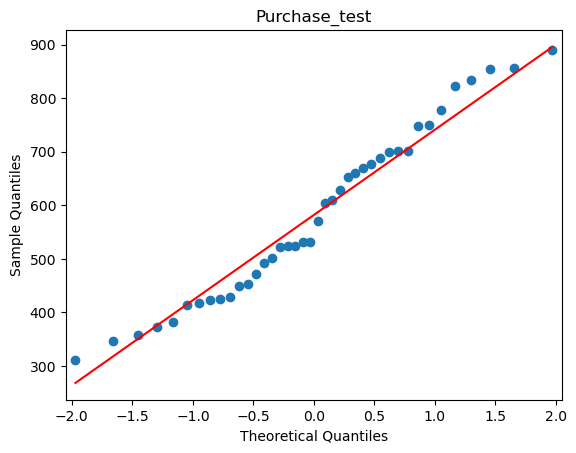

In [20]:
sm.qqplot(t_c['Purchase_test'], line='s')
plt.title("Purchase_test")
plt.show()


In [21]:
test_stat, pvalue = shapiro(t_c["Purchase_control"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9773, p-value = 0.5891


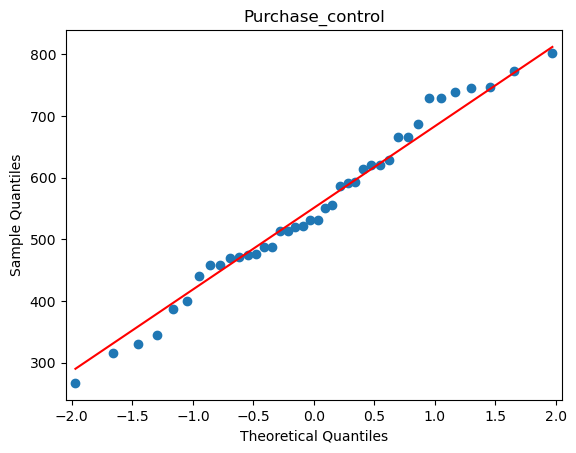

In [22]:
sm.qqplot(t_c['Purchase_control'], line='s')
plt.title("Purchase_control")
plt.show()

In [23]:
t_c = t_c.dropna(subset=["Purchase_test", "Purchase_control"])


C:\Users\User Laptop\AppData\Local\Temp\ipykernel_16952\1017858778.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([t_c["Purchase_test"], t_c["Purchase_control"]], labels=["Test", "Control"])


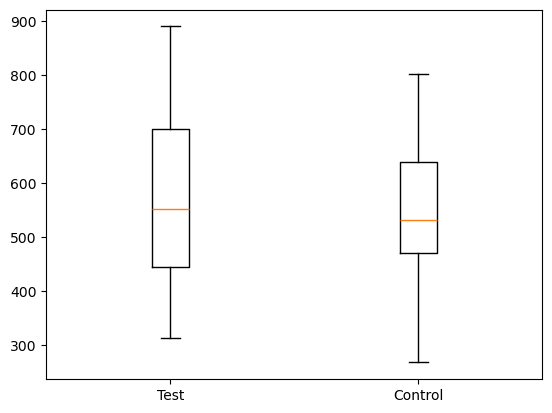

In [24]:
plt.boxplot([t_c["Purchase_test"], t_c["Purchase_control"]], labels=["Test", "Control"])
plt.show()


In [ ]:
#3.1.2.Test auf Varianzhomogenität

In [25]:
test_stat, pvalue = levene(t_c["Purchase_control"],
                           t_c["Purchase_test"])
print("Test stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test stat = 2.6393, p-value = 0.1083


In [ ]:
#3.2

Da beide Annahmen erfüllt sind, wählen wir den parametrischen Test: " Independent Sample T Test"

In [ ]:
#3.3.

In [26]:
test_stat, pvalue = ttest_ind(t_c["Purchase_control"],
                              t_c["Purchase_test"],
                              equal_var=True)
print("Test stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test stat = -0.9416, p-value = 0.3493


Da der p-Wert größer als 0,05 ist (0.34 > 0.05), können wir die Nullhypothese nicht ablehnen.
Das heißt, dass es keinen statistisch signifikanten Unterschied zwischen 
den Mittelwerten der Gruppen „purchase-control“ und „purchase-test“ gibt.

Basierend auf den Analyseergebnissen gibt es keinen statistisch signifikanten Unterschied zwischen der 'maximum bidding'- und der 'average bidding'-Methode in Bezug auf die Kaufvariable (Purchase).

Der Unterschied zwischen den Durchschnittswerten der beiden Gruppen ist  zufällig.

